# Data Visualization  
## What is Data Visualization

Visualizing data in easy to understand graphical formats is as old a practice as mathematics itself.  We visualize data to explore, to summarize, to compare, to understand trends and above all, to be able to tell a story.  

**Why is visualization so powerful?**  
Visualization is powerful because it cues into the 'pre-attentive attributes' that our brain can process extremely fast.  They are information the human brain can process visually almost immediately, and  patterns we can detect without thinking or processing.  

Consider the picture below, and you can see how our mind is instantly directed to key elements highlighted.  

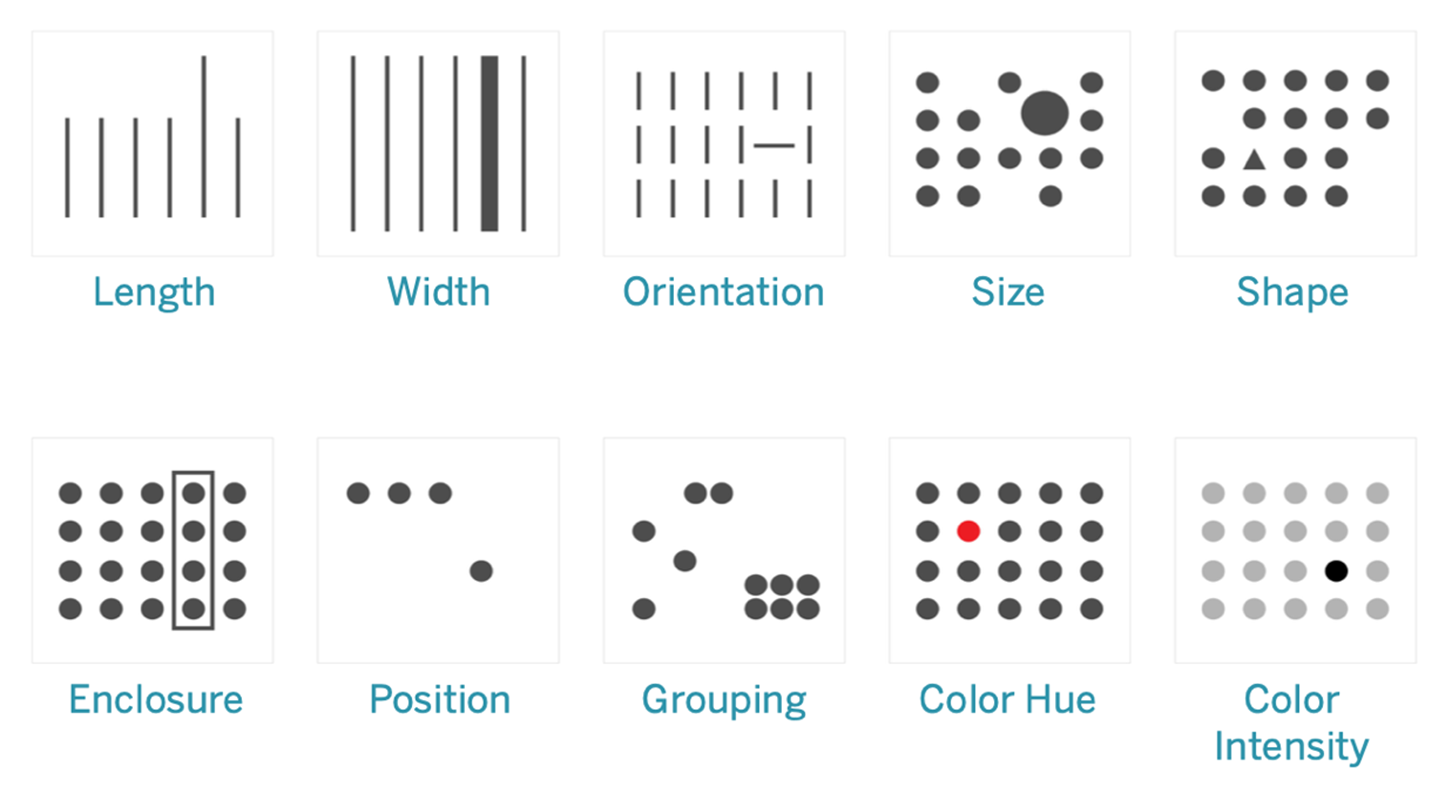

_Source: https://help.tableau.com/current/blueprint/en-us/bp_why_visual_analytics.htm_


**Things to bear in mind**  
When thinking of using visualization to explore data, or tell a story from data, we generally intuitively know what makes sense.  This is because we live in a visual world, and just by experience know what works and what is less effective.  

Yet it is 
- **Know your audience**: are they mathematically savvy, or lay people?  
- **Know your data**: what kind of data do you have decides the kind of visualization to use?  
- **Consider the delivery mechanism**: will the visualization be delivered over the web, in print, in a PowerPoint, or in an email?  
- **Select the right visuals**: in addition to the type of chart or visualization, think about special effects from lines, markers, colors  
- **Use common visual cues in charts**: use the same color schemes, similar visual pointers so that the audience is immediately oriented to the most important aspects  
- **Make your point stand out**: is the graphic highlighting the point you are trying to make?  
- **Consider the ‘Data-Ink Ratio’**:  Data-ink ratio is ratio of Ink that is used to present actual data compared to the total amount of ink used in the graphic)  
- **Be credible, avoid games**: build trust in your work for your audience  
- **Consider repeatability**: how difficult would it be for you to do the same work a month down the line?  
- **Avoid 3D, doughnuts, pie charts**: they confuse and obfuscate, and do not impress an educated audience  
- **Finally, always label the axes !** 

**Key chart types**  
Visualization is a vast topic.  It includes customized graphics, dashboards that combine text and multiple visualizations in one place, and interactive drill-downs.  Yet the building blocks of all of these are a set of basic chart types, which are what we will cover here.  Dashboards are creative combinations of these, combined with text and lists.  

For our purposes, it will suffice if we look at the major types of charts in our toolkit, and how and when it is appropriate to use them.  

We will cover: 

- Histograms  
- Barplots  
- Boxplots  
- Scatterplots  
- Lineplots  
- Pairplots  
- Heatmaps  

**Usual library imports**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import YouTubeVideo 

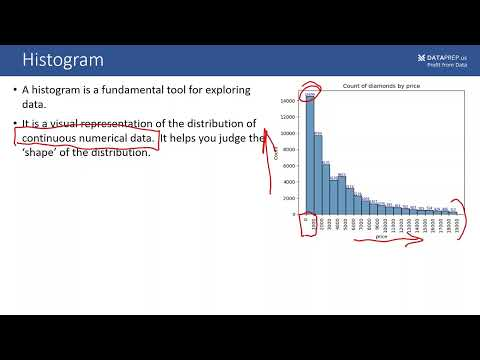

In [2]:
YouTubeVideo('Qwpi07RUXMw', width=672, height=378)

**Load data**

As before, we will use the diamonds dataset from seaborn.  This is a dataset of abotu 50,000 diamonds with their prices, and other attributes such as carat, color, clarity etc.  

In [53]:
df = sns.load_dataset('diamonds')

***
## Histograms and KDEs

A histogram is a visual representation of the distribution of continuous numerical data.  It helps you judge the ‘shape’ of the distribution.  A histogram is a fundamental tool for exploring data.

To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. 

The size of the bin interval matters a great deal, as we will see below.  

The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins must be adjacent and are often (but not required to be) of equal size.  

**Histograms versus bar-charts**: Histograms are different from bar-charts which are used for categorical data.  You will notice that the bars for a histogram are right next to each other to indicate continuity, whereas for a bar-chart they are separated by a gap or white space, indicating that there is no continuity or order implied by the placement of the bars.  


In [54]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

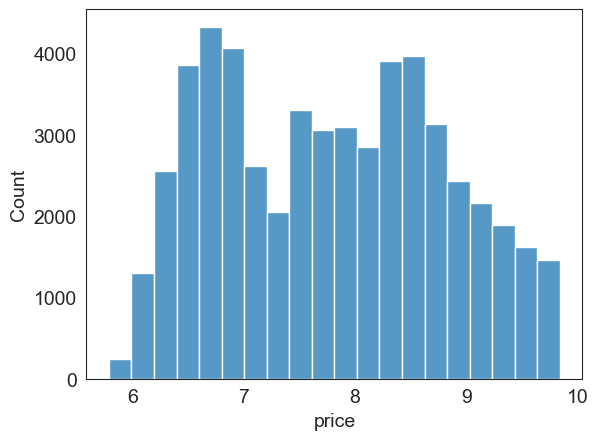

In [55]:
# Plot a histogram of diamond prices

ax = sns.histplot(np.log(df['price']),  bins = 20 ); 


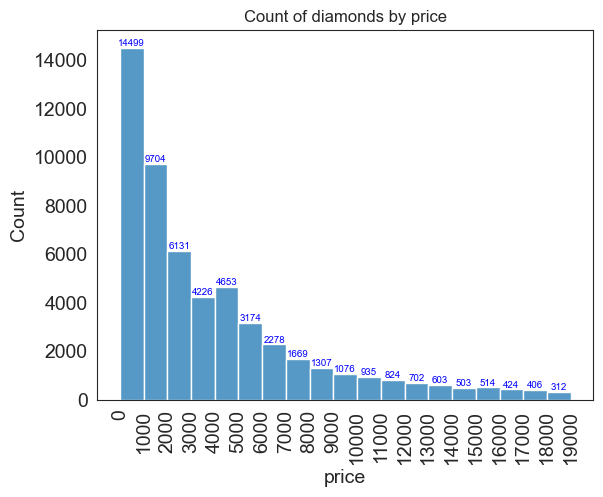

In [56]:
# Plot a histogram of diamond prices
x = np.arange(0,20000,1000)

fig, ax = plt.subplots()
# y = sns.histplot(df['price'],  bins = x ).set(title='Count of diamonds by price')
plt.xticks(x)
plt.xticks(rotation=90)


y = sns.histplot(df.price, element="bars", bins=x, stat='count', legend=False)


for i in y.containers:
    y.bar_label(i,fontsize=7,color='b')
plt.rcParams['font.size'] = 10
ax.set_title('Count of diamonds by price')
plt.show()


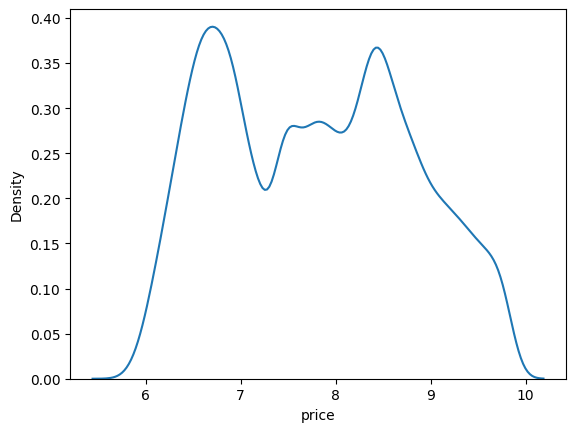

In [7]:
# Plot a kernel density estimate plot of diamond prices

sns.kdeplot(data=df, x=np.log(df['price']));

### Histograms and distribution types  
Histograms are extremely useful to understand where the data is when looked at as a distribution.  They are the truest embodiment of the saying that a picture is worth a thousand words.  

Next, let us look at some common distributions - the normal distribution, left and right skewed distribution, bi-modal distribution and the uniform distribution.  They are constructed below using artificial random data, but the goal is to emphasize the shape of the resulting distribution that you could observe with real data as well.  

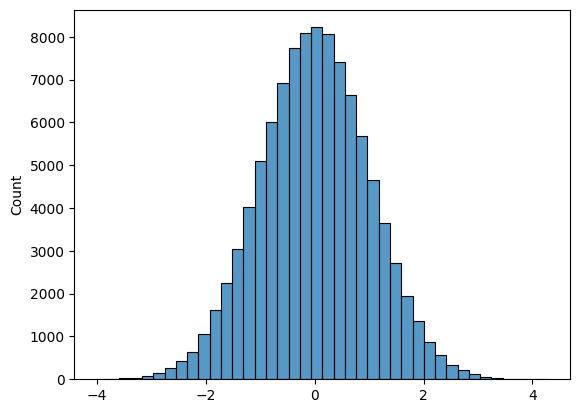

In [8]:
# Plot a histogram of 100000 normal random variables, split across 40 bins

sns.histplot(np.random.normal(size = 100000),  bins = 40 ); 

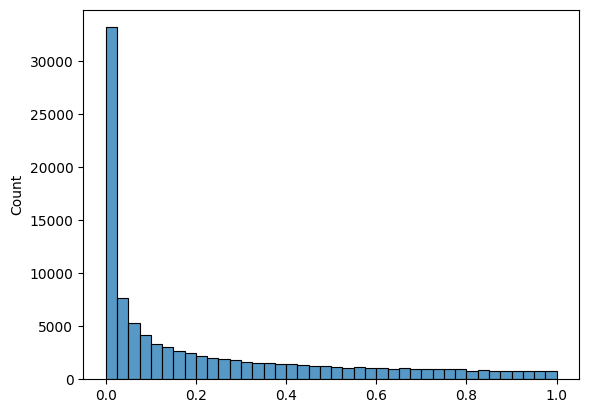

In [9]:
# Plot a right skewed histogram of 100000 normal random variables, 
# split across 40 bins, (using the beta distribution)

sns.histplot(np.random.beta(a=0.3, b = 1,size = 100000),  bins = 40 );

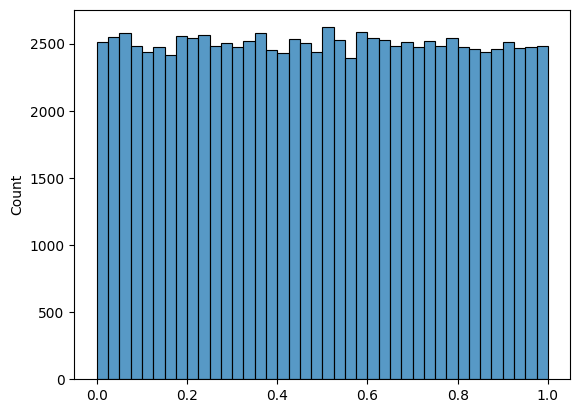

In [10]:
# Plot a uniform distribution

sns.histplot(np.random.beta(a=1, b = 1,size = 100000),  bins = 40 ); 

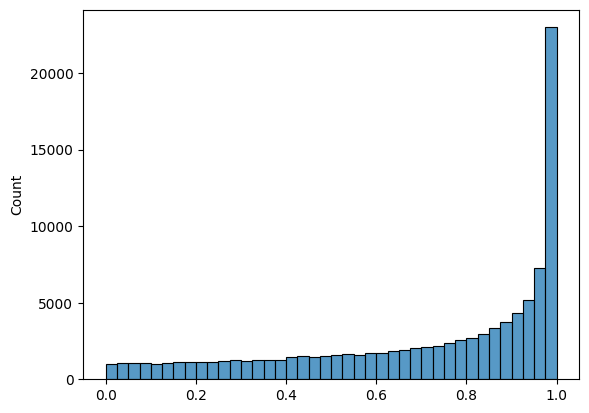

In [11]:
# Plot a left skewed histogram 

sns.histplot(np.random.beta(a=1, b = .4,size = 100000),  bins = 40 ); 

In [12]:
# Plot a bi-modal histogram.
# Notice the 'trick' used - we add two normal distributions
# with different means

list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 2, size = 100000))
list3 = list1 + list2

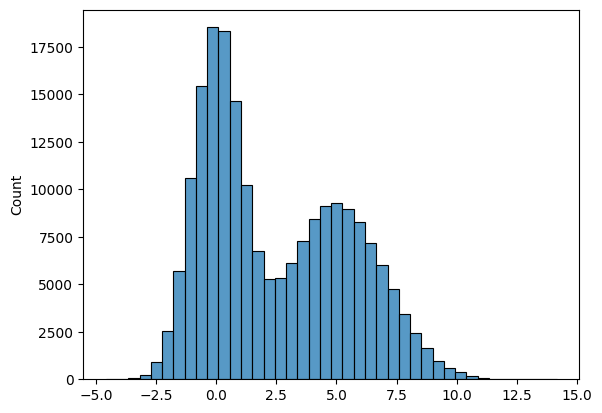

In [13]:
sns.histplot(list3,  bins = 40 ); 

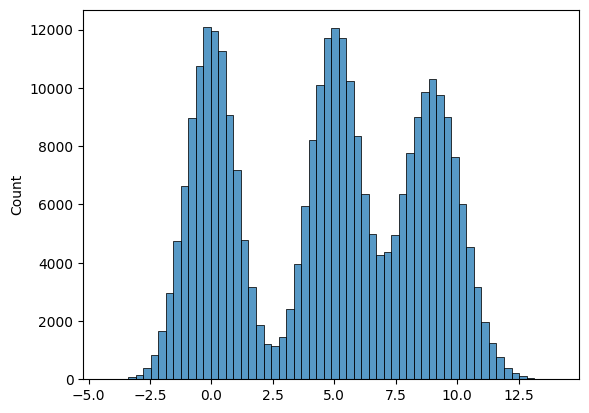

In [14]:
# Another graphic where we get several peaks in the histogram

list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 1, size = 100000))
list3 = list(np.random.normal(loc = 9, scale = 1.2, size = 100000))
list4 = list1 + list2 + list3
sns.histplot(list4,  bins = 60 ); 

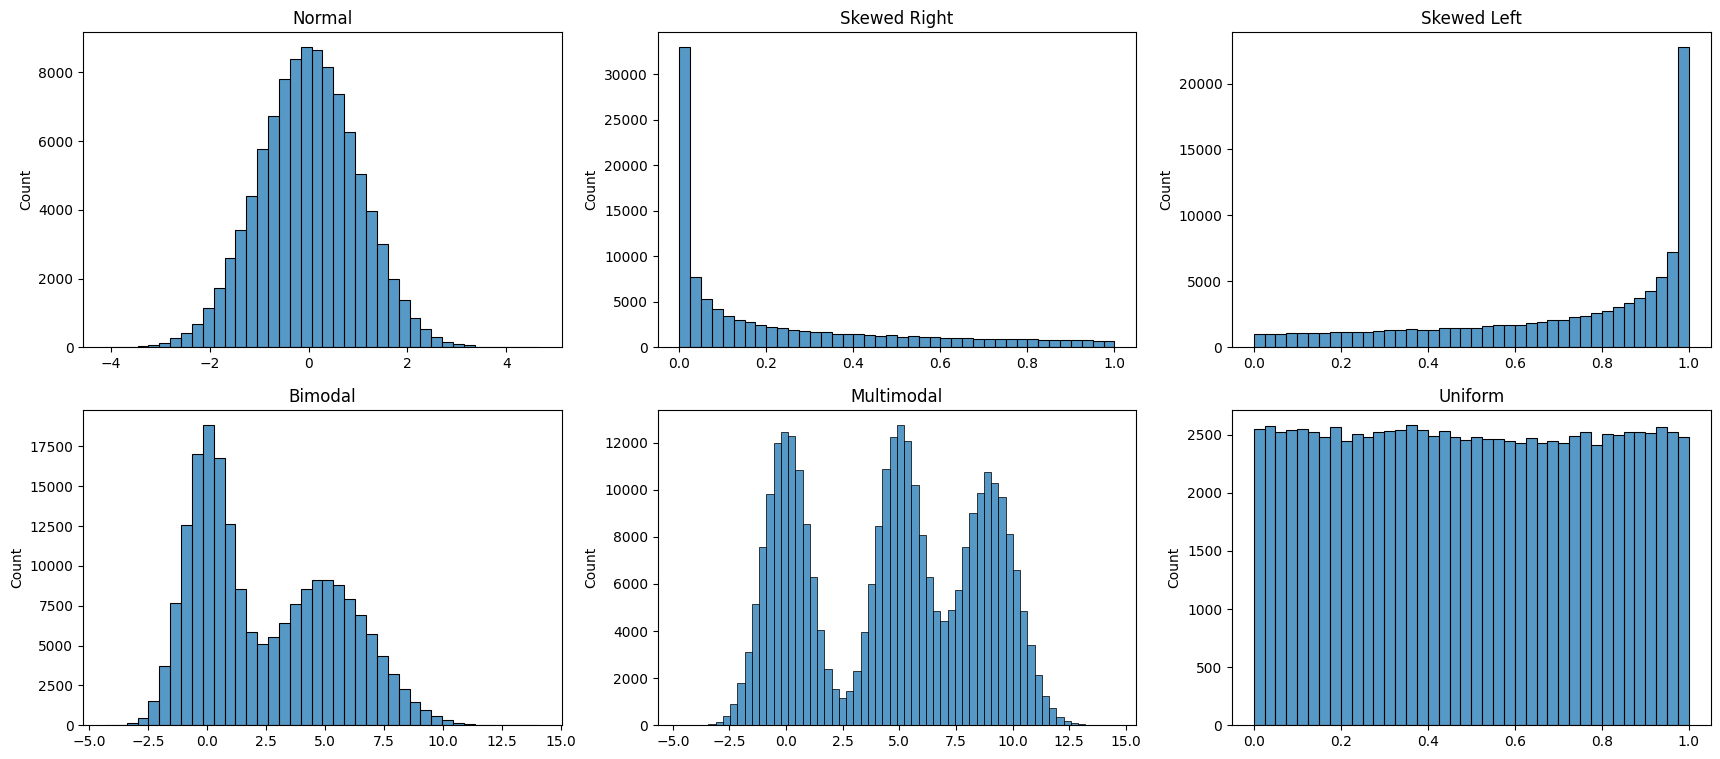

In [15]:
# Finally, we bring all the above different types of distributions
# together in a single graphic


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (21,9))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
ax1 = sns.histplot(np.random.normal(size = 100000),  bins = 40, ax = ax1 ) 
ax1.set_title('Normal')

ax2 = sns.histplot(np.random.beta(a=0.3, b = 1,size = 100000),  bins = 40, ax = ax2 )
ax2.set_title('Skewed Right')

ax3 = sns.histplot(np.random.beta(a=1, b = .4,size = 100000),  bins = 40, ax = ax3 ) 
ax3.set_title('Skewed Left')

list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 2, size = 100000))
list3 = list1 + list2
sns.histplot(list3,  bins = 40, ax = ax4 ) 
ax4.set_title('Bimodal')

list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 1, size = 100000))
list3 = list(np.random.normal(loc = 9, scale = 1.2, size = 100000))
list4 = list1 + list2 + list3
sns.histplot(list4,  bins = 60, ax = ax5 ) 
ax5.set_title('Multimodal')

sns.histplot(np.random.beta(a=1, b = 1,size = 100000),  bins = 40, ax = ax6 ) 
ax6.set_title('Uniform');



### Bin Size

For histograms, bin size matters.  Generally, the larger the bin size, the less information you will see.  See examples below of the visualization of the same data but using different bin sizes.  

Look at the two plots below, they represent the same data, but with vastly different bin intervals.  They tell completely different stories!

Bin boundaries should align with how people would read the data.  



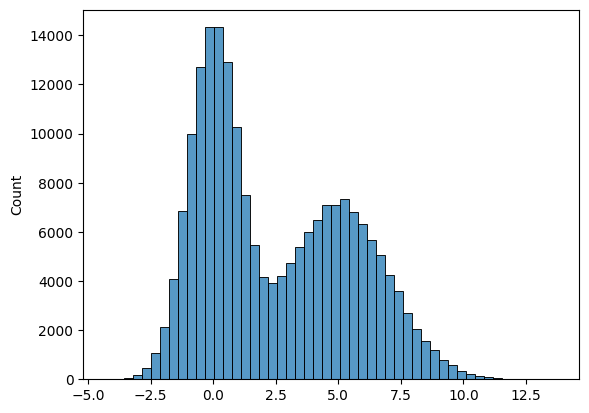

In [16]:
list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 2, size = 100000))
list3 = list1 + list2
sns.histplot(list3,  bins = 50);

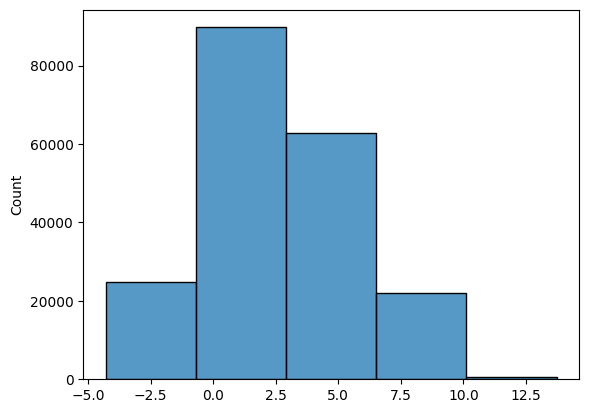

In [17]:
sns.histplot(list3,  bins = 5);

### Kernel Density Estimates  
Kernel density estimation is a way to estimate the probability density function (PDF) of a random variable.  

One way to think about KDE plots is that these represent histograms with very small bin sizes where the tops of each bar has been joined together with a line.

While this simple explanation suffices for most of us, there is a fair bit of mathematics at work behind KDE plots.  Consider the diagram below.  Each small black vertical line on the x-axis represents a data point. The individual kernels (Gaussians in this example, but others can be specified as well) are shown drawn in dashed red lines above each point. 

The solid blue curve is created by summing the individual Gaussians and forms the overall density plot.  

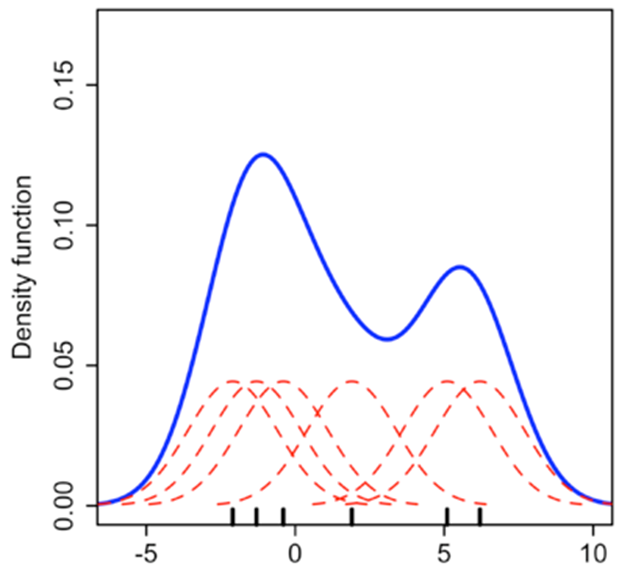

_Source: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0_

Next, let us create KDEs for our random data.  

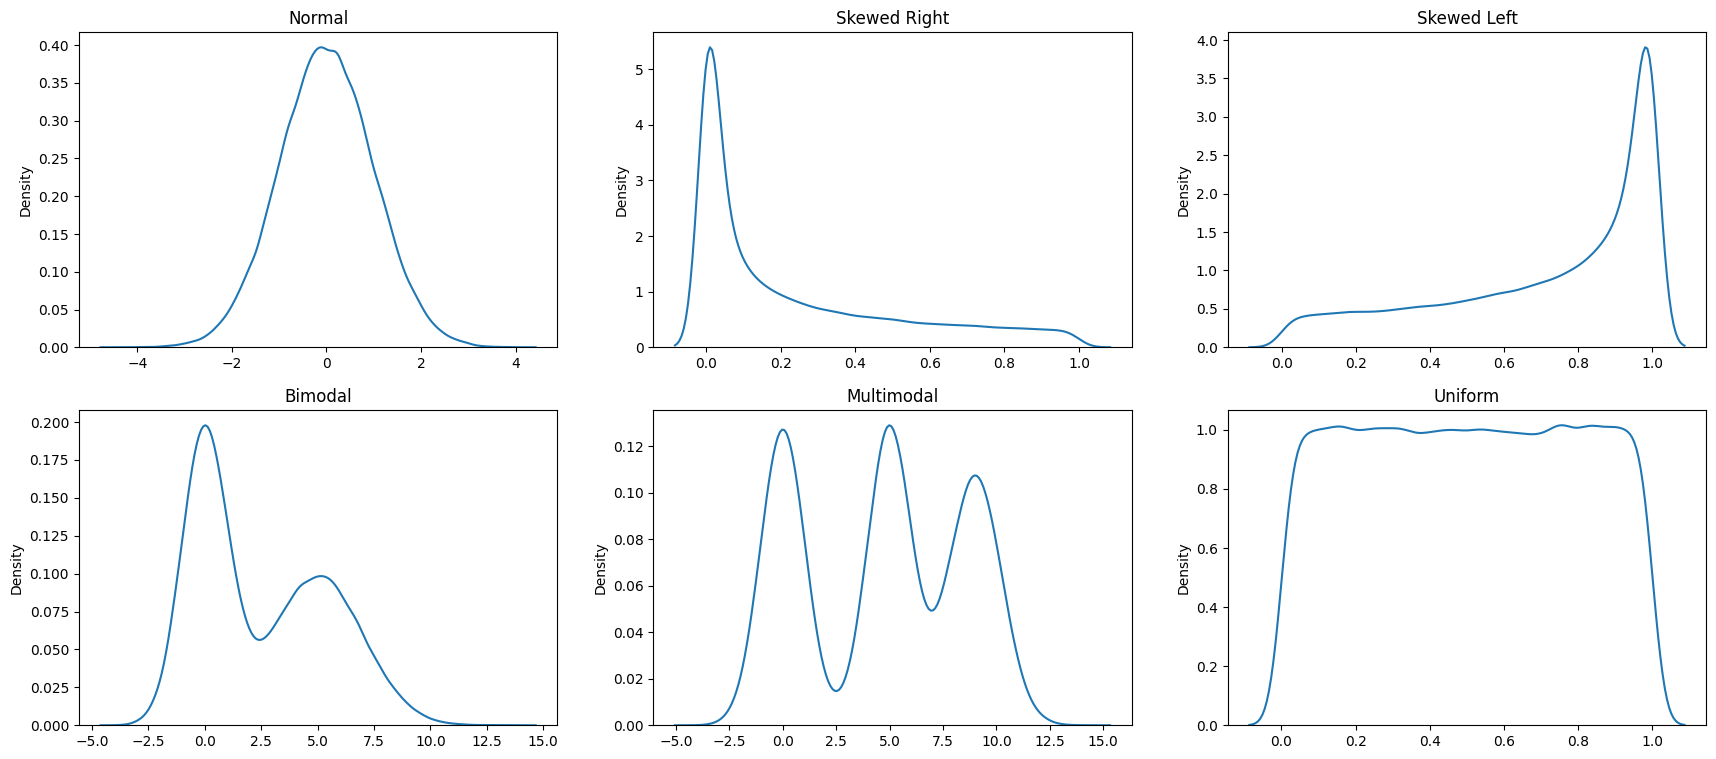

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (21,9))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
ax1 = sns.kdeplot(np.random.normal(size = 100000),  ax = ax1 ) 
ax1.set_title('Normal')

ax2 = sns.kdeplot(np.random.beta(a=0.3, b = 1,size = 100000),  ax = ax2 )
ax2.set_title('Skewed Right')

ax3 = sns.kdeplot(np.random.beta(a=1, b = .4,size = 100000),  ax = ax3 ) 
ax3.set_title('Skewed Left')

list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 2, size = 100000))
list3 = list1 + list2
sns.kdeplot(list3,  ax = ax4 ) 
ax4.set_title('Bimodal')

list1 = list(np.random.normal(size = 100000))
list2 = list(np.random.normal(loc = 5, scale = 1, size = 100000))
list3 = list(np.random.normal(loc = 9, scale = 1.2, size = 100000))
list4 = list1 + list2 + list3
sns.kdeplot(list4,   ax = ax5 ) 
ax5.set_title('Multimodal')

sns.kdeplot(np.random.beta(a=1, b = 1,size = 100000),   ax = ax6 ) 
ax6.set_title('Uniform');



***
## Barplots

Barplots are easy to understand, and require little explanation.  They are also called bar graphs, or column charts.  They are used for categorical variables and show the frequency of the observations for each of the categories.  

Consider the number of diamonds for each color category.  We can demonstrate the data as a data table, and then show the same information in a barplot.  

**Data Table**

In [19]:
df = sns.load_dataset('diamonds')
df[['color']].value_counts().sort_index()

color
D         6775
E         9797
F         9542
G        11292
H         8304
I         5422
J         2808
Name: count, dtype: int64

**Barplot**  

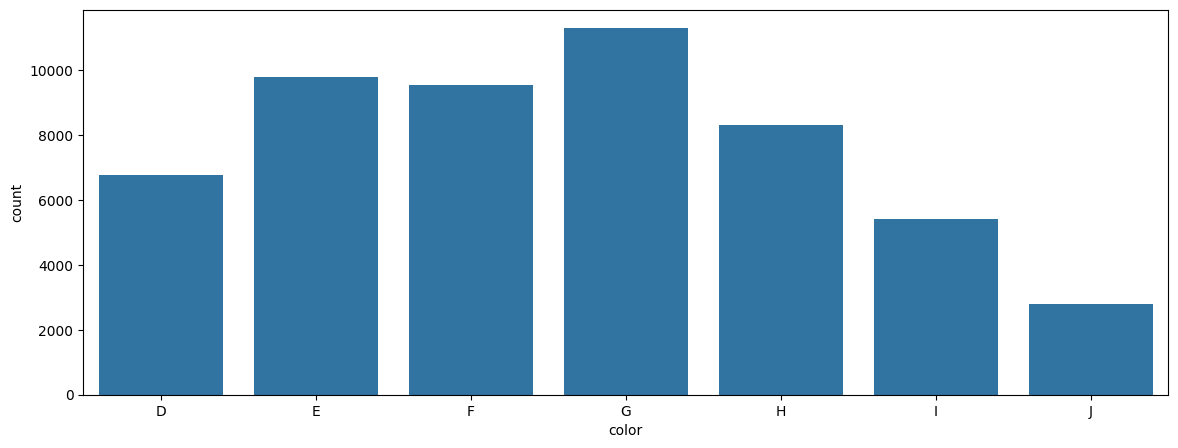

In [20]:
plt.figure(figsize = (14,5))
sns.countplot(x='color', data=df, order = np.sort(df['color'].unique()) );


Most software will allow you to combine several data elements together in a barplot.
The chart below shows barplots for both cut and color.


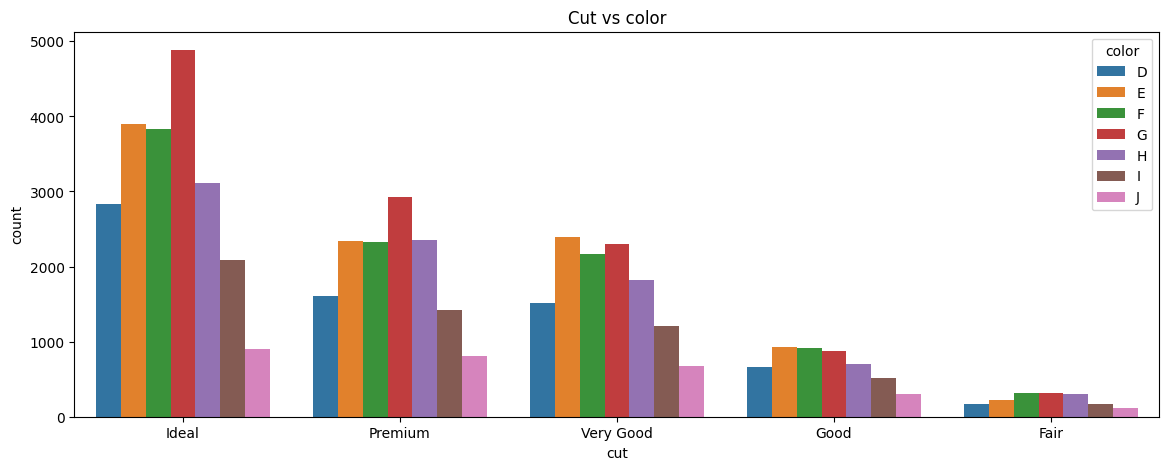

In [21]:
plt.figure(figsize = (14,5))
sns.countplot(x='cut', data=df, hue='color').set_title('Cut vs color');

### Stacked barplots

<Axes: xlabel='cut', ylabel='Count'>

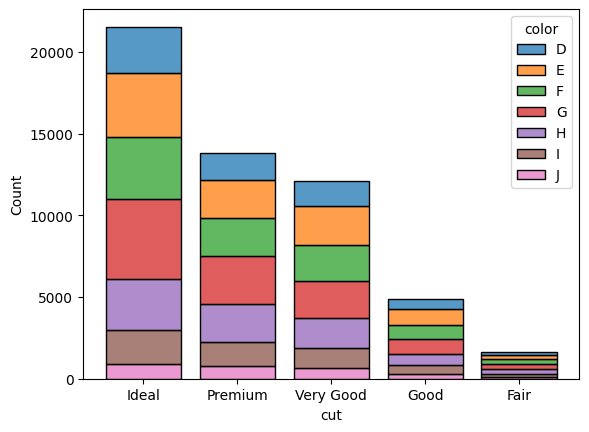

In [22]:
sns.histplot(data=df, hue="color", x="cut", shrink=.8, multiple = "stack")

<Axes: xlabel='cut', ylabel='Count'>

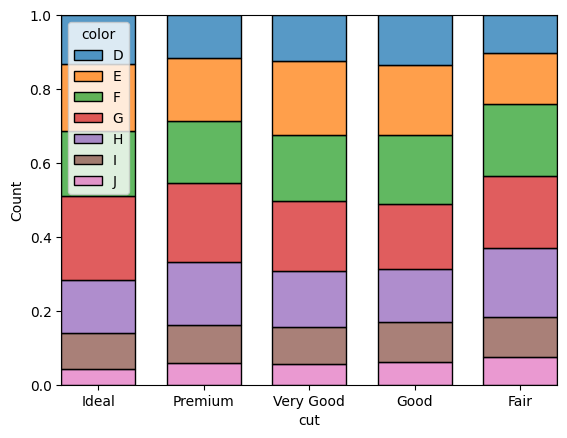

In [23]:
sns.histplot(data=df, hue="color", x="cut", shrink=.7, multiple = "fill")


***
## Boxplots  

Boxplots are useful tools to examine distributions visually.  But they can be difficult to interpret for non-analytical or non-mathematical users.


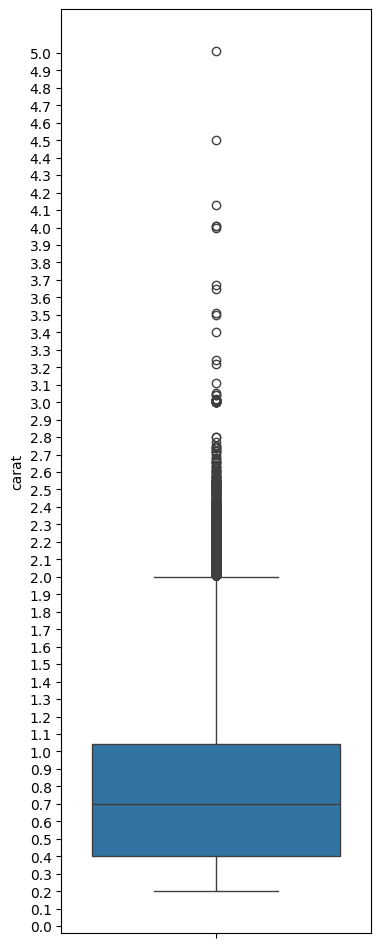

In [24]:
plt.figure(figsize = (4,12))
ax = sns.boxplot(data = df, y = 'carat', )
custom_ticks = np.linspace(0, 5, 51)
ax.set_yticks(custom_ticks);



**Interpreting the boxplot:**  

The boxplot above has a lot of lines and points.  What do they mean?  The below graphic describes how to interpret a boxplot.  

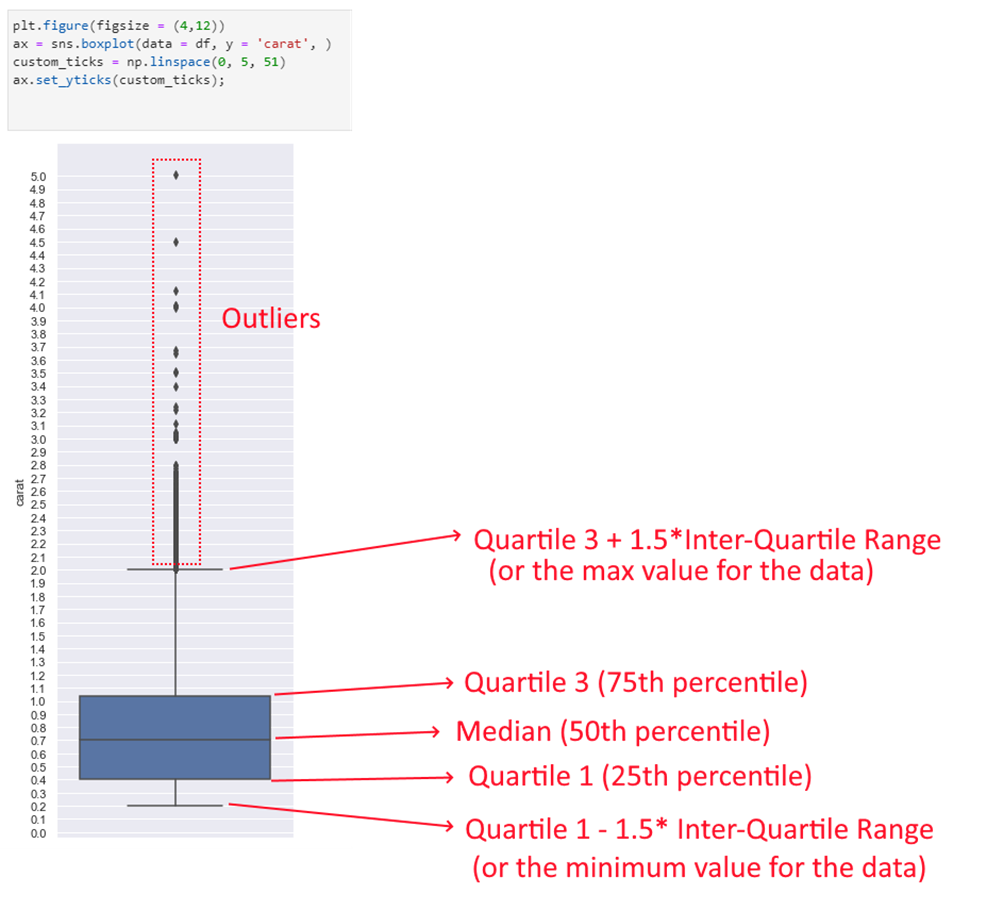

Compare the above image with the data for the quartiles etc below.  You can see that the lines correspond to the actual calculations for min, max, quartiles etc.  

In [25]:

Q3 = df.carat.quantile(0.75)
Q1 = df.carat.quantile(0.25)
Median = df.carat.median()
Min = df.carat.min()
Max = df.carat.max()
print('Quartile 3 is = ', Q3)
print('Quartile 1 is = ', Q1)
print('Median is = ', Median)
print('Min for the data is = ', Min)
print('Max for the data is = ', Max)
print('IQR is = ', df.carat.quantile(0.75) - df.carat.quantile(0.25))
print('Q3 + 1.5*IQR = ', Q3 + (1.5* (Q3 - Q1)))
print('Q1 - 1.5*IQR = ', Q1 - (1.5* (Q3 - Q1)))

Quartile 3 is =  1.04
Quartile 1 is =  0.4
Median is =  0.7
Min for the data is =  0.2
Max for the data is =  5.01
IQR is =  0.64
Q3 + 1.5*IQR =  2.0
Q1 - 1.5*IQR =  -0.5599999999999999


  
  
**Barplot, with another dimension added**  
Below is another example of a boxplot, but with a split/dimension added for clarity.  

<Axes: xlabel='clarity', ylabel='carat'>

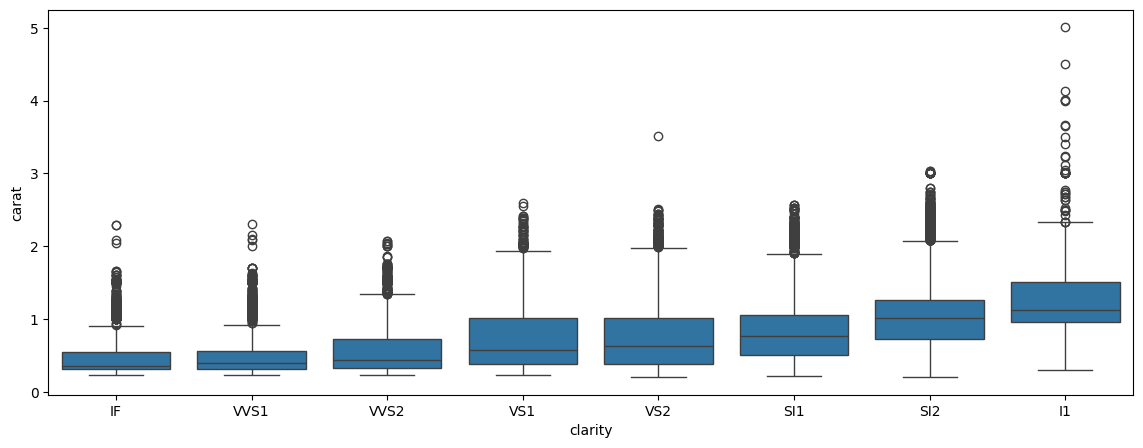

In [26]:
plt.figure(figsize = (14,5))

sns.boxplot(data = df, x = 'clarity', y = 'carat')

***
## Scatterplots  

Unlike the previous chart types which focus on one variable, scatterplots allow us to examine the relationship between two variables.  

At their core, they are just plots of (x, y) data points on a coordinate system.

Often a regression line is added to scatterplots to get a more precise estimate of the correlation.
Outlier points can be identified visually.

If there are too many data points, scatterplots have the disadvantage of overplotting.

Consider the scatterplot below, which plots a random set of 500 data points from the diamonds dataset.  We picked only 500 points to avoid overplotting.  It shows us the relationship between price and carat weight.  


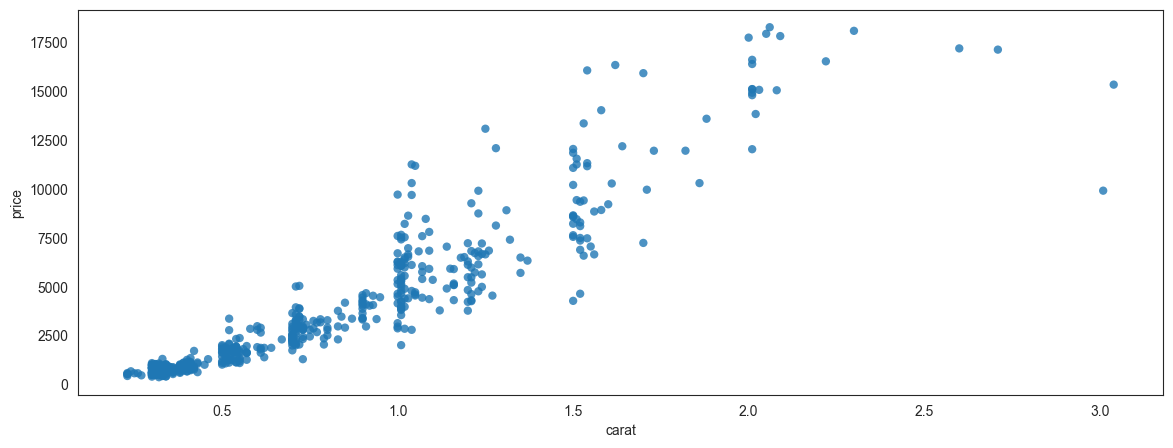

In [27]:
## Scatterplot

sns.set_style(style='white')
plt.figure(figsize = (14,5))
sns.scatterplot(data = df.sample(500), x = 'carat', y = 'price', 
                alpha = .8, edgecolor = 'None');

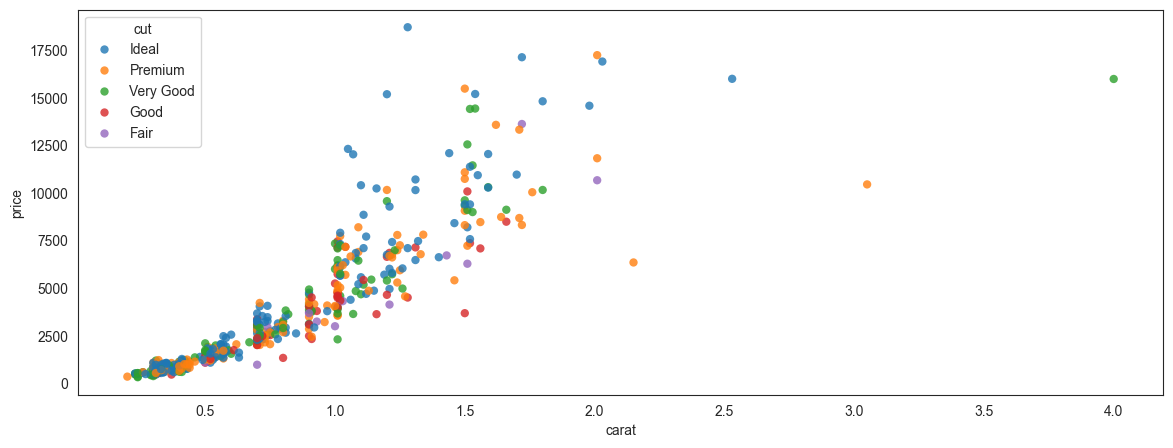

In [28]:
## Scatterplot

sns.set_style(style='white')
plt.figure(figsize = (14,5))
sns.scatterplot(data = df.sample(500), x = 'carat', y = 'price', 
                hue = 'cut', alpha = .8, edgecolor = 'None');

**Pick additional dimensions to represent through marker attributes using hue, size and style.**

By creatively using hue, size and style, you can represent additional dimensions in a scatterplot.


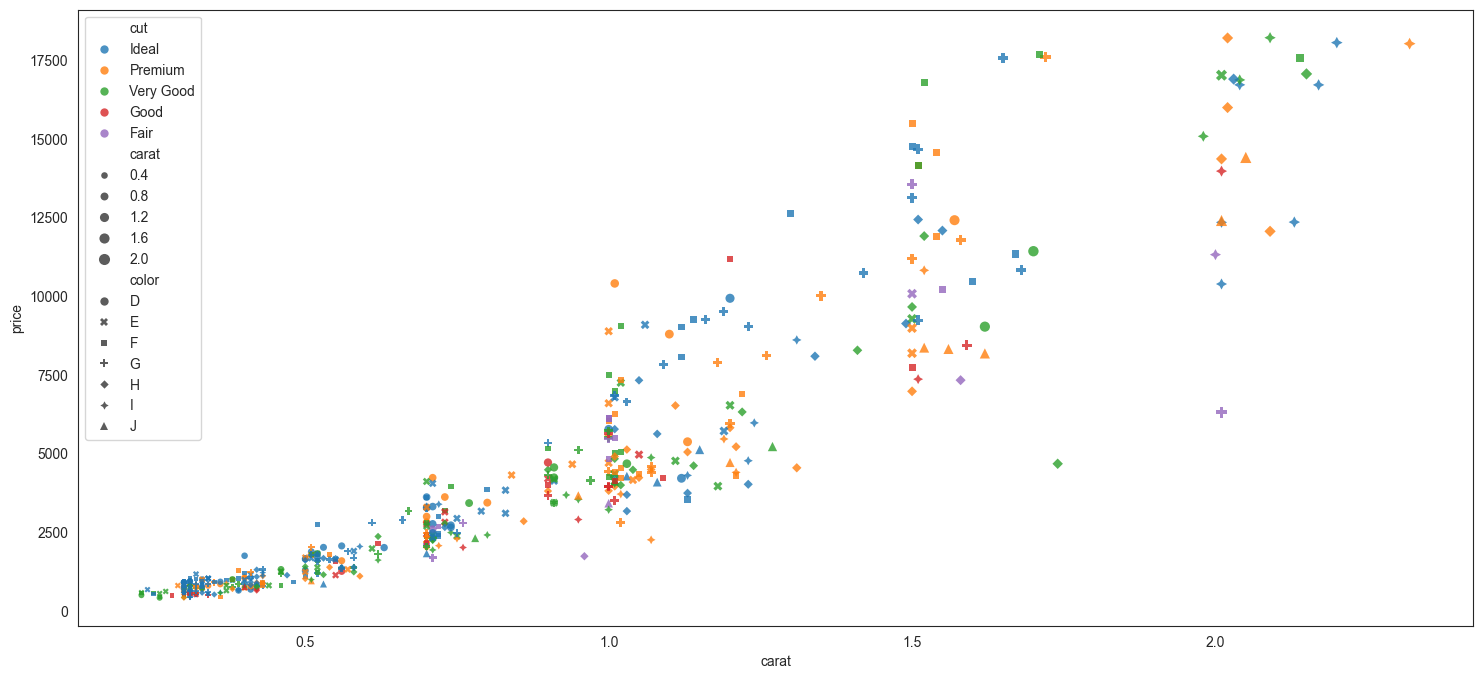

In [29]:
sns.set_style(style='white')
plt.figure(figsize = (18,8))
sns.scatterplot(data = df.sample(500), x = 'carat', y = 'price', 
                hue = 'cut', size= 'carat', style = 'color',  alpha = .8, edgecolor = 'None');

**Scatterplot - another example**  
We plot miles per gallon vs a car's weight (mtcars dataset)

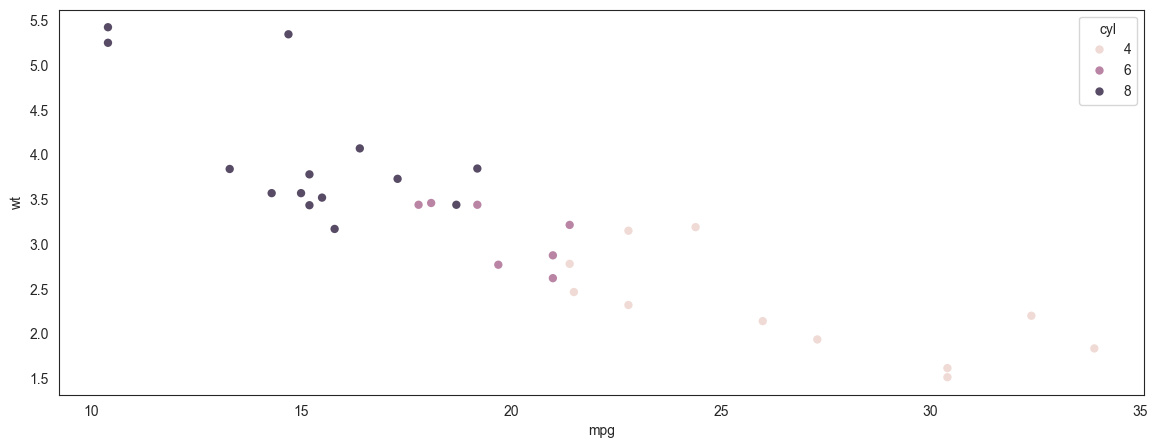

In [30]:
plt.figure(figsize = (14,5))
mtcars = sm.datasets.get_rdataset('mtcars').data
sns.scatterplot(data = mtcars, x = 'mpg', y = 'wt', 
                hue = 'cyl', alpha = .8, edgecolor = 'None');


**Plotting a regression line**  

Continuing the prior example of miles per gallon to weight, we add a regression line to the scatterplot.  

Note that with Seaborn you are able to specify the confidence level around the line, and also the ‘order’ of the regression.  Though we do not do that here, just something to be aware of.  We will learn about the order of the regression in the chapter on regression.  


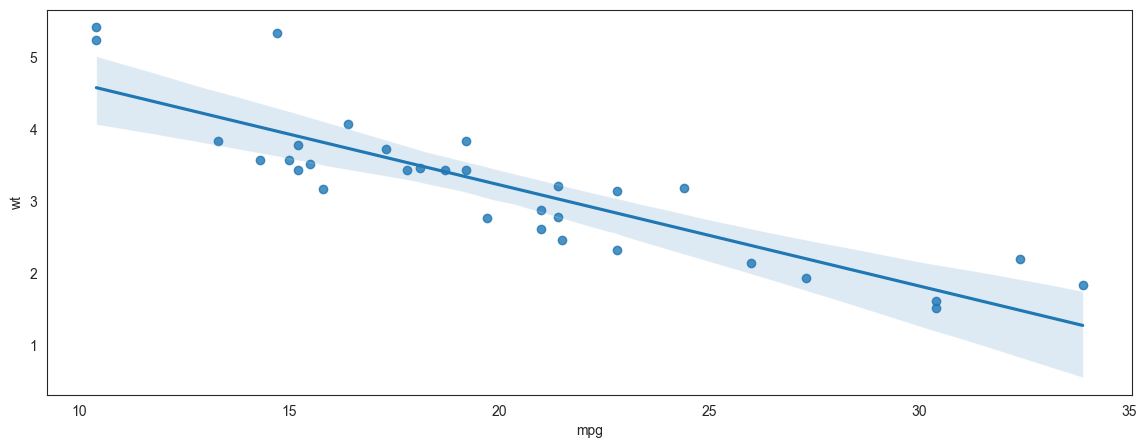

In [31]:
plt.figure(figsize = (14,5))
mtcars = sm.datasets.get_rdataset('mtcars').data
sns.regplot(data = mtcars, x = 'mpg', y = 'wt', ci = 99, order = 1);

**An example of overplotting**  
We talked about overplotting earlier.  Overplotting happens when too many datapoints are plotted in a small space so they overlap each other and it becomes visually difficult to discern anything meaningful from the graphic.

Let us try to plot all the 50,000 diamonds together in a scatterplot (remember, we plotted only 500 earlier) and see what we get.  

Obviously, this graphic is not very helpful as the datapoints are too crowded.  

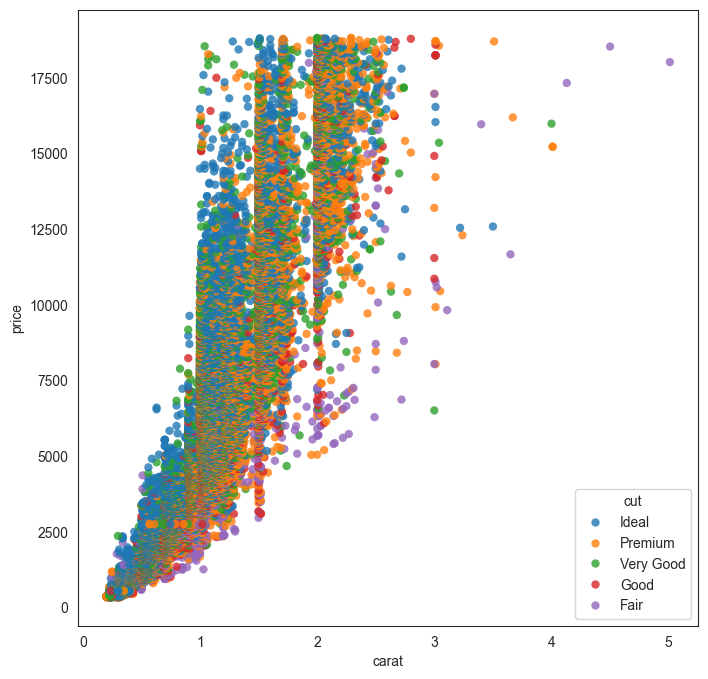

In [32]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'cut', alpha = .8, edgecolor = 'None'); 

**An example of a scatterplot with uncorrelated data**  
Here is a made up example of a scatterplot constructed with randomly selected _x_ and _y_ variables.  

Since there is no correlation, the data appears as a cloud with no specific trend.  The goal of this graphic is just to demonstrate what uncorrelated data would look like.


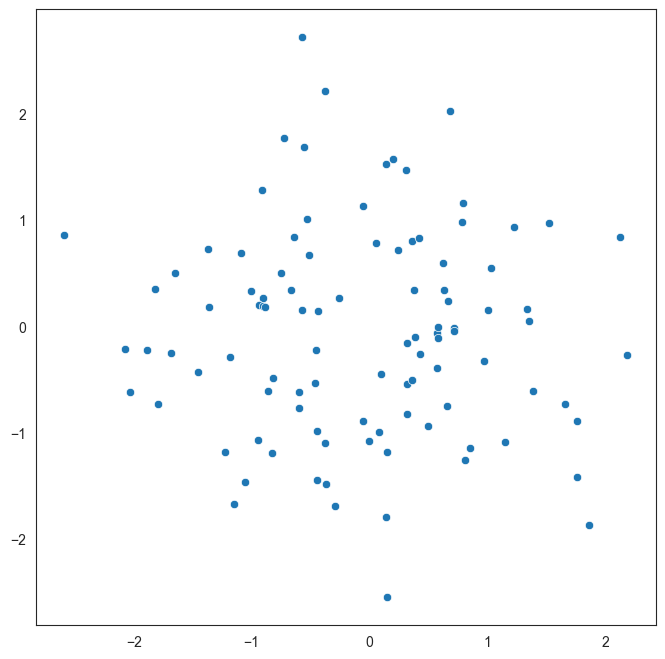

In [33]:
plt.figure(figsize = (8,8))
sns.scatterplot(x=np.random.normal(size = 100), y=np.random.normal(size = 100));

### Anscombe's Quartet

**Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data when analyzing it, and the effect of outliers and other influential observations on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."**  

_Source: Wikipedia at https://en.wikipedia.org/wiki/Anscombe%27s_quartet_


Anscombe's quartet is an example that illustrates how graphing the data can be a powerful tool providing insights that mere numbers cannot.  

In [34]:
## Source: https://seaborn.pydata.org/examples/anscombes_quartet.html

anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [35]:
# Print datasets for slides

print('Dataset 1:')
print('x:', list(anscombe[anscombe['dataset']=='I'].x))
print('y:', list(anscombe[anscombe['dataset']=='I'].y),'\n')
print('Dataset 2:')
print('x:', list(anscombe[anscombe['dataset']=='II'].x))
print('y:', list(anscombe[anscombe['dataset']=='II'].y),'\n')
print('Dataset 3:')
print('x:', list(anscombe[anscombe['dataset']=='III'].x))
print('y:', list(anscombe[anscombe['dataset']=='III'].y),'\n')
print('Dataset 4:')
print('x:', list(anscombe[anscombe['dataset']=='IV'].x))
print('y:', list(anscombe[anscombe['dataset']=='IV'].y),'\n')

Dataset 1:
x: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68] 

Dataset 2:
x: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y: [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74] 

Dataset 3:
x: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y: [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73] 

Dataset 4:
x: [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
y: [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89] 



In [36]:
print(np.corrcoef(anscombe[anscombe['dataset']=='I'].x,anscombe[anscombe['dataset']=='I'].y))
print(np.corrcoef(anscombe[anscombe['dataset']=='II'].x,anscombe[anscombe['dataset']=='II'].y))
print(np.corrcoef(anscombe[anscombe['dataset']=='III'].x,anscombe[anscombe['dataset']=='III'].y))
print(np.corrcoef(anscombe[anscombe['dataset']=='IV'].x,anscombe[anscombe['dataset']=='IV'].y))

[[1.         0.81642052]
 [0.81642052 1.        ]]
[[1.         0.81623651]
 [0.81623651 1.        ]]
[[1.         0.81628674]
 [0.81628674 1.        ]]
[[1.         0.81652144]
 [0.81652144 1.        ]]


In [37]:
# We rearrage the data as to put the four datasets in the quarted side-by-side

pd.concat([anscombe.query("dataset=='I'").reset_index(), 
           anscombe.query("dataset=='II'").reset_index(), 
           anscombe.query("dataset=='III'").reset_index(), 
           anscombe.query("dataset=='IV'").reset_index()],axis=1)


,index,dataset,x,y,index,dataset,x,y,index,dataset,x,y,index,dataset,x,y
0,0,I,10.0,8.04,11,II,10.0,9.14,22,III,10.0,7.46,33,IV,8.0,6.58
1,1,I,8.0,6.95,12,II,8.0,8.14,23,III,8.0,6.77,34,IV,8.0,5.76
2,2,I,13.0,7.58,13,II,13.0,8.74,24,III,13.0,12.74,35,IV,8.0,7.71
3,3,I,9.0,8.81,14,II,9.0,8.77,25,III,9.0,7.11,36,IV,8.0,8.84
4,4,I,11.0,8.33,15,II,11.0,9.26,26,III,11.0,7.81,37,IV,8.0,8.47
5,5,I,14.0,9.96,16,II,14.0,8.10,27,III,14.0,8.84,38,IV,8.0,7.04
6,6,I,6.0,7.24,17,II,6.0,6.13,28,III,6.0,6.08,39,IV,8.0,5.25
7,7,I,4.0,4.26,18,II,4.0,3.10,29,III,4.0,5.39,40,IV,19.0,12.50
8,8,I,12.0,10.84,19,II,12.0,9.13,30,III,12.0,8.15,41,IV,8.0,5.56
9,9,I,7.0,4.82,20,II,7.0,7.26,31,III,7.0,6.42,42,IV,8.0,7.91


In [38]:
anscombe.query("dataset=='I'")

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [39]:
# Next, we calculate the descriptive stats and 
# find that these are nearly identical for the four datasets.

pd.concat([anscombe.query("dataset=='I'")[['x','y']].reset_index(drop=True), 
           anscombe.query("dataset=='II'")[['x','y']].reset_index(drop=True), 
           anscombe.query("dataset=='III'")[['x','y']].reset_index(drop=True), 
           anscombe.query("dataset=='IV'")[['x','y']].reset_index(drop=True)],axis=1).describe()

,x,y,x,y,x,y,x,y
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


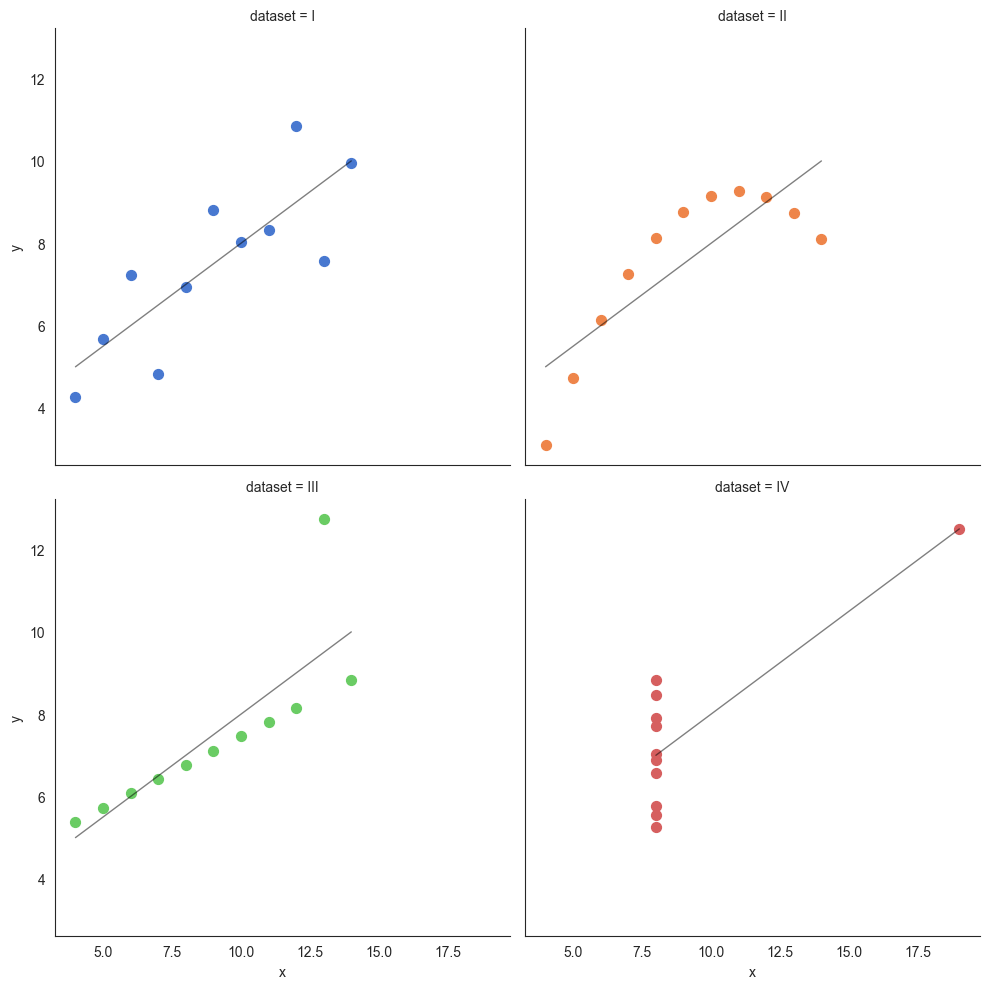

In [40]:
# But when we plot the 4 datasets, we find a completely different picture
# that we as humans find extremely easy to interpret, but wasn't visible
# through the descriptive stats.

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=5,
           scatter_kws={"s": 50, "alpha": 1}, line_kws={"lw":1,"alpha": .5, "color":"black"})
plt.rcParams['font.size'] = 14;

### The datasaurus dataset

The data sets were created by Justin Matejka and George Fitzmaurice (see https://www.autodesk.com/research/publications/same-stats-different-graphs), inspired by the datasaurus set from Alberto Cairo (see http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html).

Downloaded from https://www.openintro.org/data/index.php?data=datasaurus

In [41]:
# Load data
datasaurus = pd.read_csv('datasaurus.csv')
datasaurus

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [42]:
1846/13

142.0

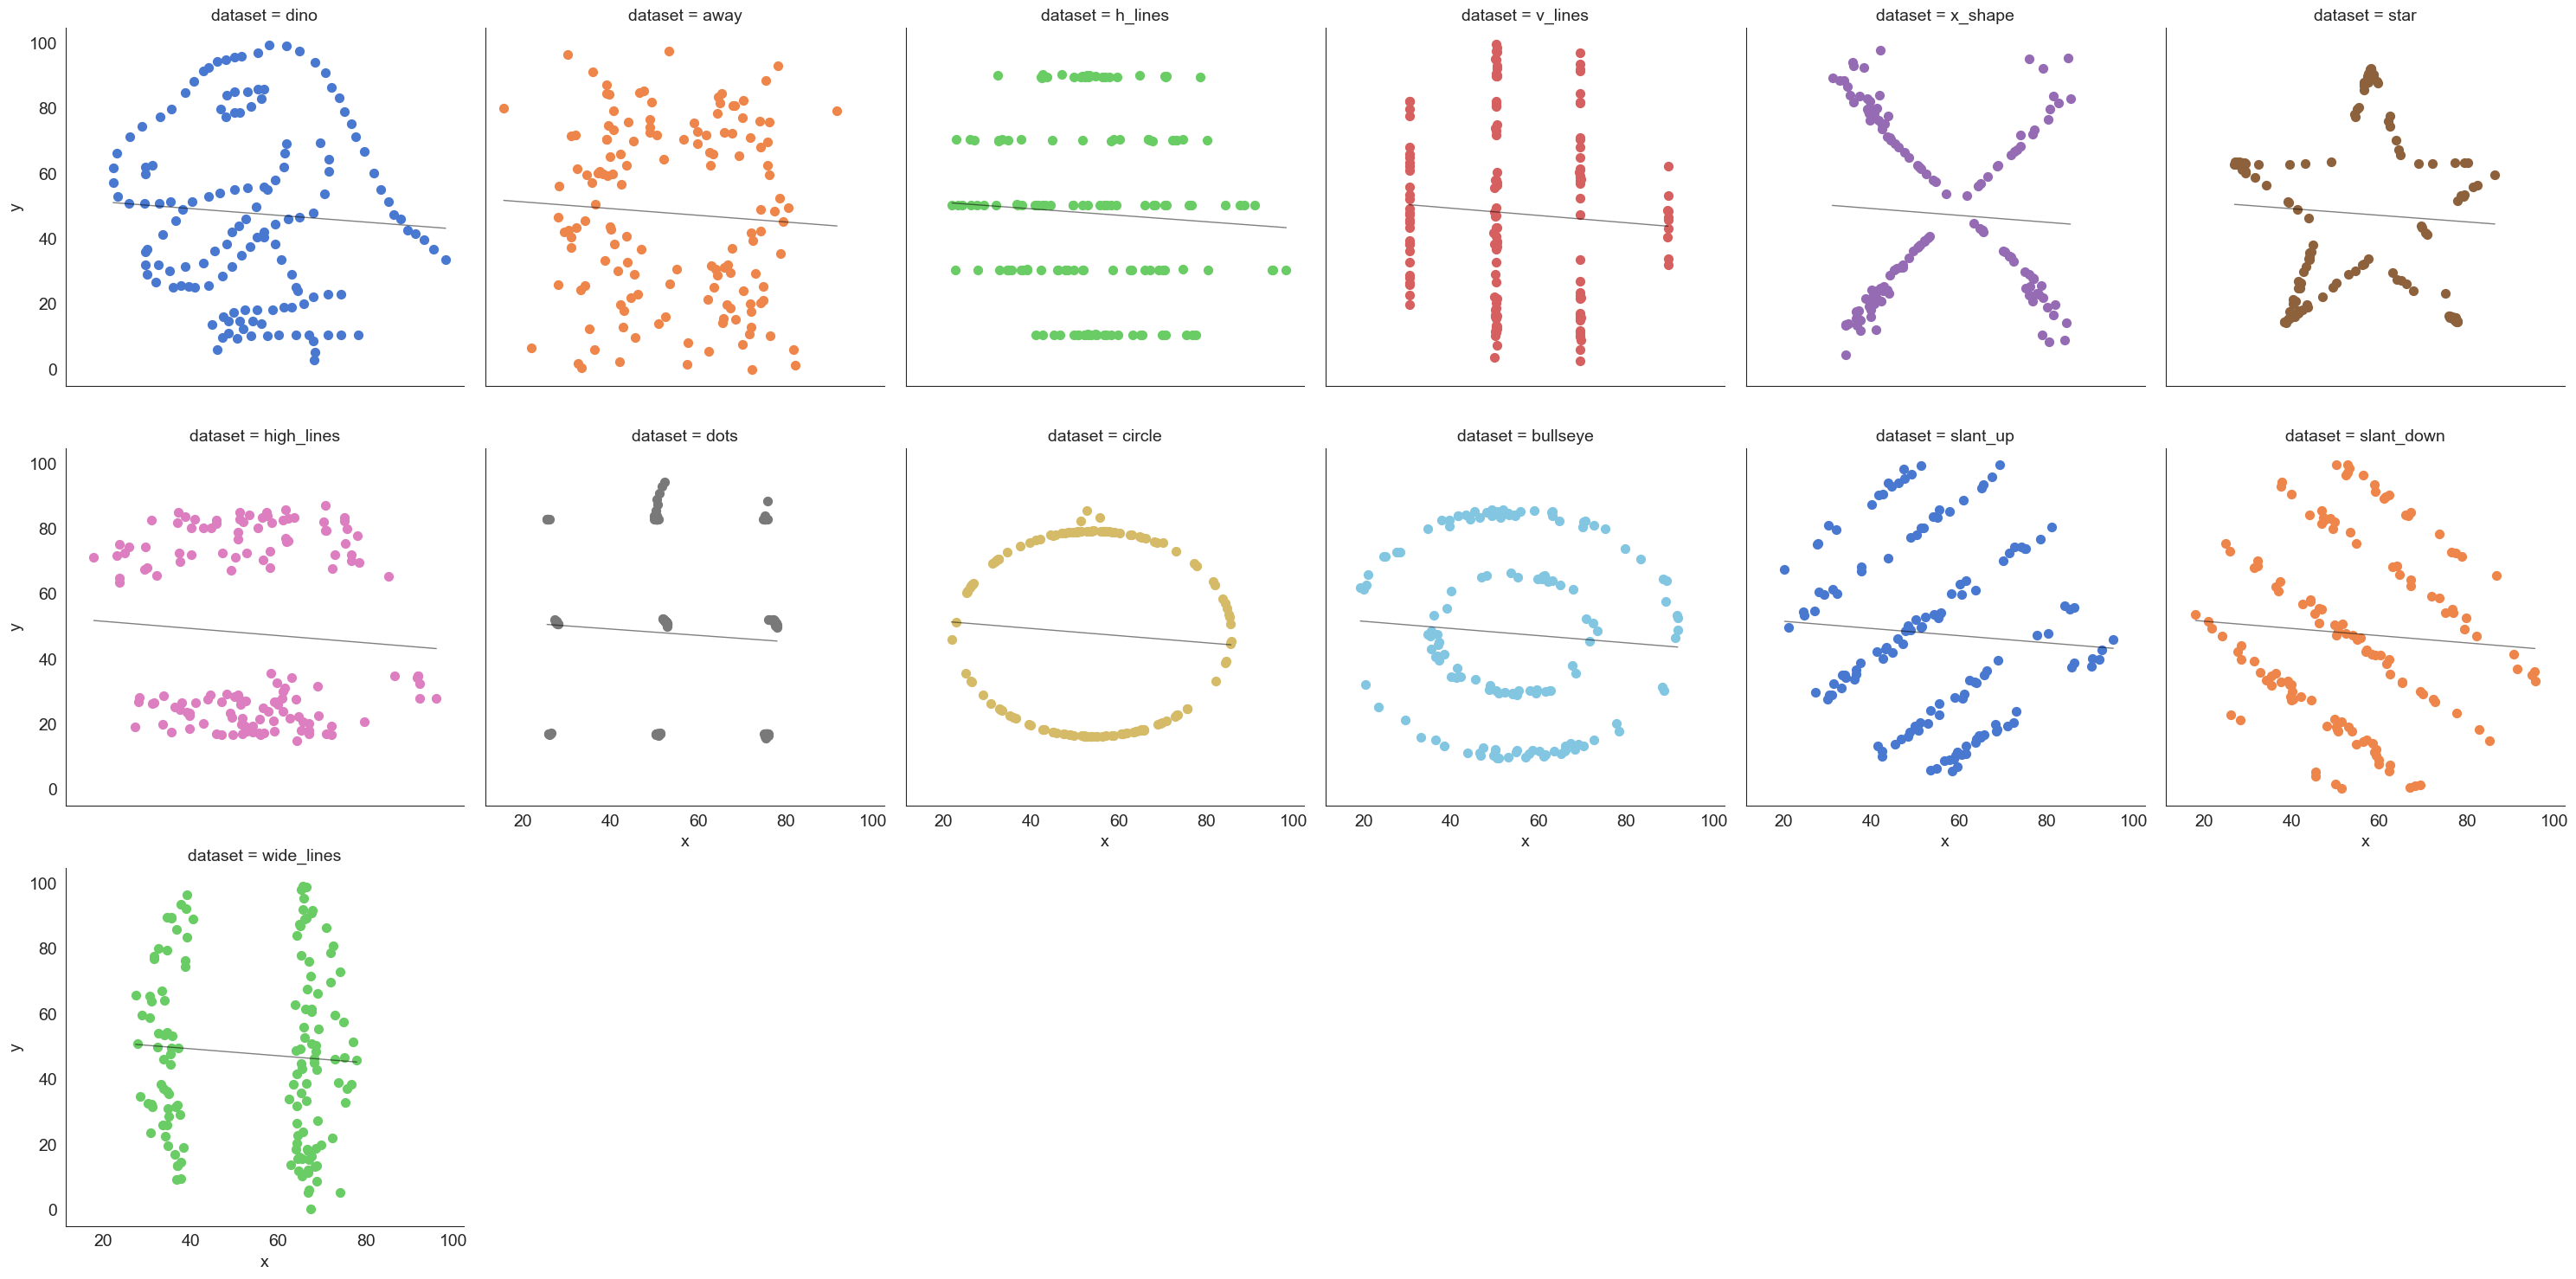

In [43]:
# Plot the data

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=datasaurus,
           col_wrap=6, ci=None, palette="muted", height=5,
           scatter_kws={"s": 50, "alpha": 1}, line_kws={"lw":1,"alpha": .5, "color":"black"})
plt.rcParams['font.size'] = 14;

***
## Line Charts

Lineplots are a basic chart type where data points are joined by line segments from left to right.  You need two variables for a lineplot, both _x_ and _y_ have to be specified.

Generally, the variable _x_ will need to be sorted before the plotting is done (else you could end up with a jumbled line).

Let us use GDP data in the dataset `macrodata’.

In [44]:
# Let us load 'macrodata'

df = sm.datasets.macrodata.load_pandas()['data']
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


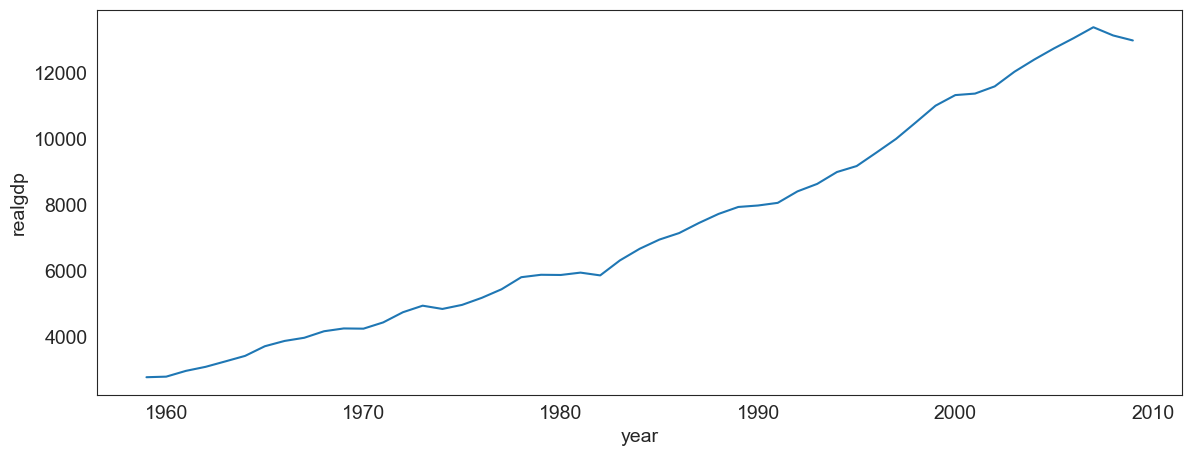

In [45]:
# Next, we graph the data

df = sm.datasets.macrodata.load_pandas()['data']
plt.figure(figsize = (14,5))
sns.lineplot(data = df.drop_duplicates('year', keep = 'last'), x = 'year', y = 'realgdp');

### Common lineplot mistakes
Make sure the data is correctly sorted, else you get a jumbled line which means nothing.  

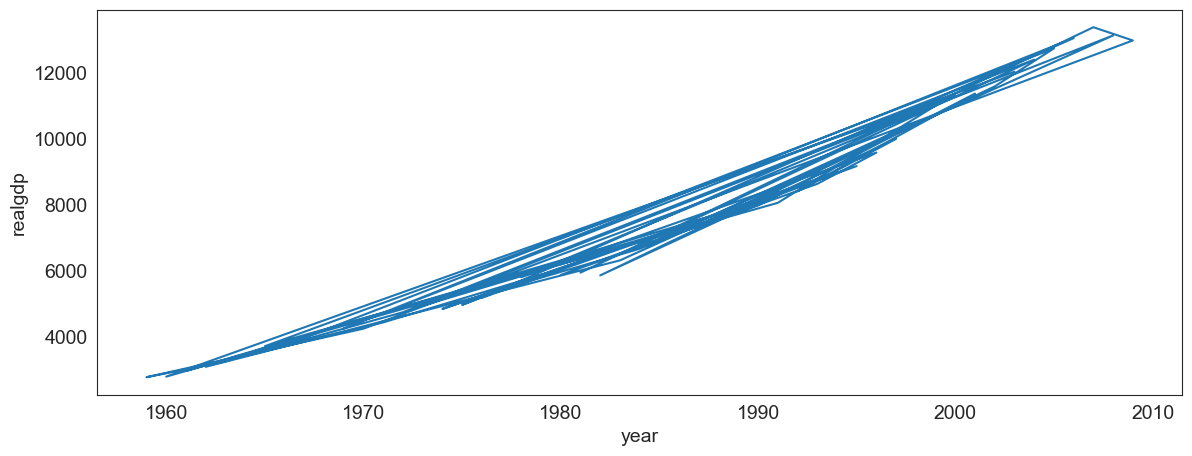

In [46]:
# Here, we jumble the data first before plotting.  And we get an incoherent graphic

plt.figure(figsize = (14,5))
sns.lineplot(data = df.drop_duplicates('year', keep = 'last').sample(frac=1), 
             sort= False, x = 'year', y = 'realgdp');

In [47]:
# Let us see a sample of the jumbled/unordered data

df.drop_duplicates('year', keep = 'last').sample(frac=1).head(3)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
155,1997.0,4.0,10008.874,6641.1,1596.523,690.311,7241.5,162.0,1074.4,5.11,4.7,274.626,1.24,3.88
99,1983.0,4.0,6325.574,4203.2,834.427,639.197,4771.1,102.1,525.1,8.89,8.5,235.385,5.13,3.76
167,2000.0,4.0,11334.544,7713.5,1987.845,695.597,8234.6,175.6,1097.7,5.70,3.9,283.900,3.89,1.81


In [48]:
# Next, we look at using lineplots for categorical data, 
# which is not a good idea!
#
# let us load the planets dataset.
# It lists over a thousand exoplanets, and how each was discovered.
df = sns.load_dataset('planets')
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [49]:
# let us look at the data on which methods where used to find planets

df.method.value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [50]:
pd.DataFrame(df.method.value_counts()).count

<bound method DataFrame.count of                                count
method                              
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1>

In [51]:
planet.count

NameError: name 'planet' is not defined

In [ ]:
sns.lineplot(data = planet)

In [ ]:
# This could well have been
# Another bad example

planet = pd.DataFrame(df.method.value_counts())
plt.figure(figsize = (6,5))
sns.lineplot(data = planet)
plt.xticks(rotation=90)
plt.title('Exoplanets - Methods of Discovery', fontsize = 14)
plt.ylabel('Number of planets')
plt.xlabel('Method used for discovering planet')

In [ ]:
# This could well have been
# Another bad example

planet = planet.sample(df.method.nunique())
plt.figure(figsize = (6,5))
sns.lineplot(data = planet)
plt.xticks(rotation = 90)
plt.title('Exoplanets - Methods of Discovery', fontsize = 14)
plt.ylabel('Number of planets')
plt.xlabel('Method used for discovering planet')

In [ ]:
# The correct way
planet = df.method.value_counts()
sns.barplot(x=planet.index, y=planet.values)
plt.xticks(rotation=90)
plt.title('Exoplanets - Methods of Discovery', fontsize = 14)
plt.ylabel('Number of planets')
plt.xlabel('Method used for discovering planet')

***
## Heatmaps  

We have all seen heatmaps, they are great at focusing our attention on the observations that are at the extremes, and different from the rest.

Heatmaps take three variables – 2 discrete variables for the axes, and one variable whose value is plotted.  

A heatmap provides a grid-like visual where the intersection of the 2 axes is colored according to the value of the variable.  

Let us consider the flights dataset, which is a monthly time series by year and month of the number of air passengers.  Below is a heatmap of the data, with month and year as the axes, and the number of air passengers providing the input for the heatmap color.


In [ ]:
pd.__version__

In [ ]:
sns.__version__

In [ ]:
import matplotlib
matplotlib.__version__

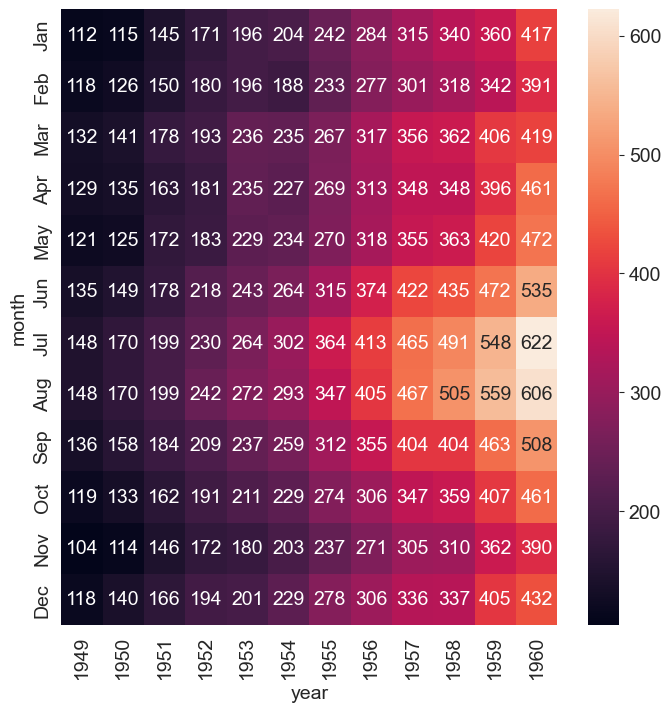

In [52]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot(index = "month", columns = "year", values= "passengers")
plt.figure(figsize = (8,8))
sns.heatmap(flights, annot=True, fmt="d");

**Heatmaps for correlations**  
Because correlations vary between -1 and +1, heatmaps allow a consistent way to visualize and present correlation information.

Combined with the flexibility Pandas allow for creating a correlation matrix, correlation heatmaps are easy to build.


In [123]:
## Let us look at correlations in the diamonds dataset

df = sns.load_dataset('diamonds')
df.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


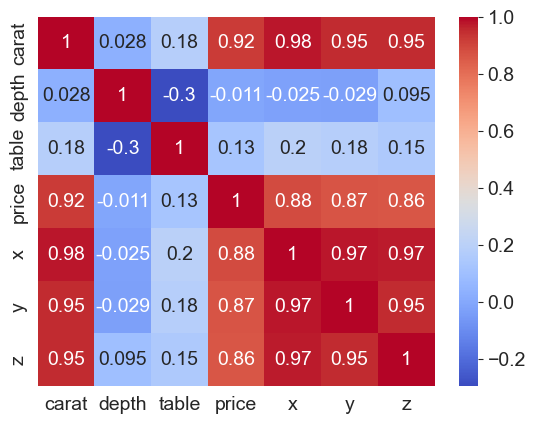

In [124]:
# Next, let us create a heatmap to see where the 
# high +ve, low and high -ve correlations lie

sns.heatmap(data = df.corr(numeric_only=True), annot= True, cmap='coolwarm');

***
## Pairplots

Pairplots are a great way to visualize multiple variables at the same time in a single graphic where the axes are shared.

The relationship between all combinations of variables is shown as a scatterplot, and the distribution of each variable appears in the diagonal.

Let us consider the diamonds dataset again. Below is a pairplot based on table, price, x and y variables.


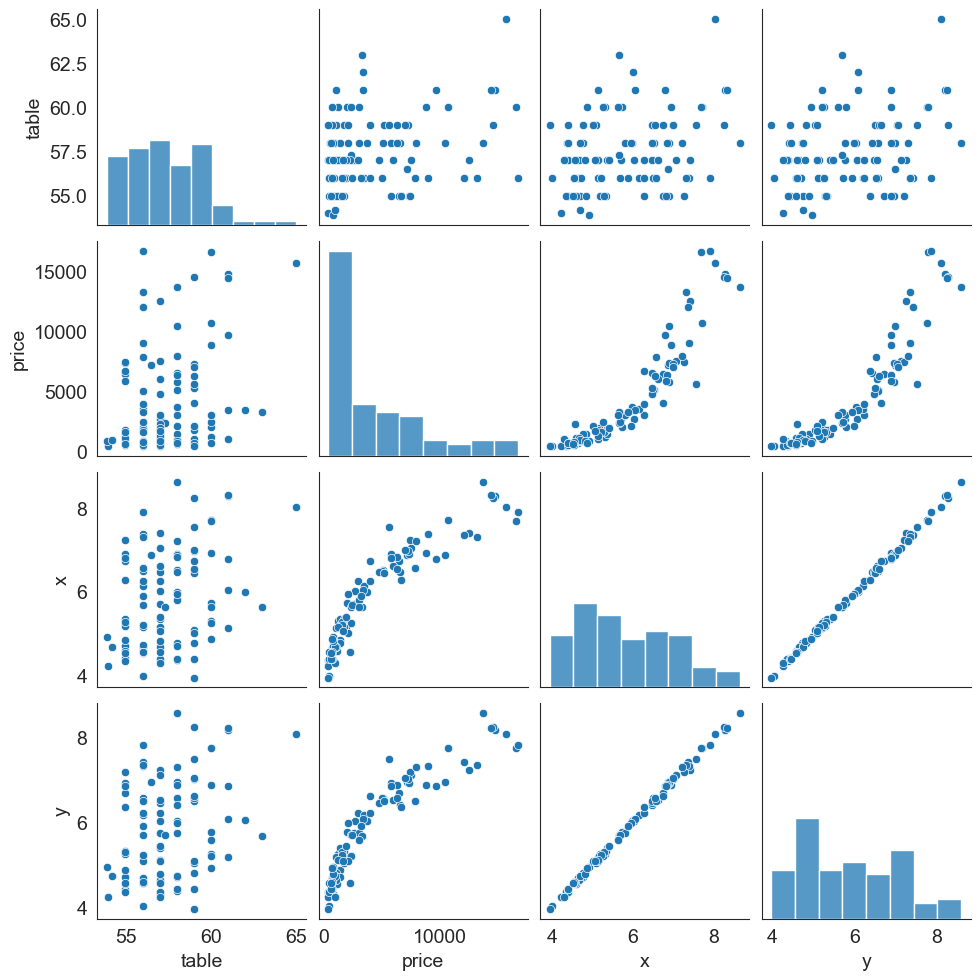

In [125]:
sns.pairplot(data = df[['table', 'price', 'x', 'y', 'color']].sample(100));

It is possible to add additional dimensions to color the points plotted (just as we could with scatterplots).  

The graphic next shows the same plot as in the prior slide, but with ‘hue’ set to be the diamond’s color.
Note that the univariate diagonal has changed from histograms to KDE.


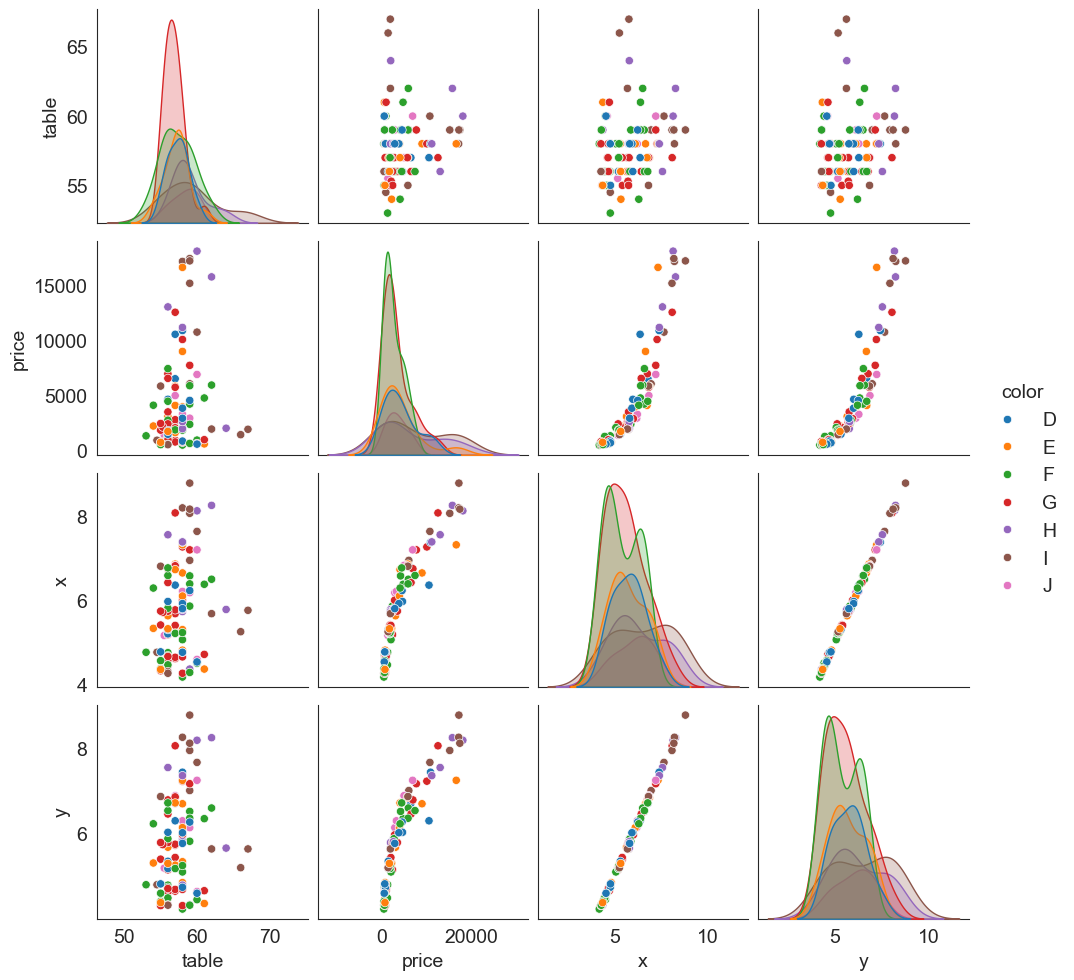

In [126]:
sns.pairplot(data = df[['table', 'price', 'x', 'y', 'color']].sample(100), hue = 'color');

## Lying with Graphs
_Source: https://www.nationalgeographic.com/science/article/150619-data-points-five-ways-to-lie-with-charts_

It is extremely easy to manipulate visualizations to present a story that doesn't exist, or is plainly wrong.

Consider the graphs below.  What is wrong with them?  

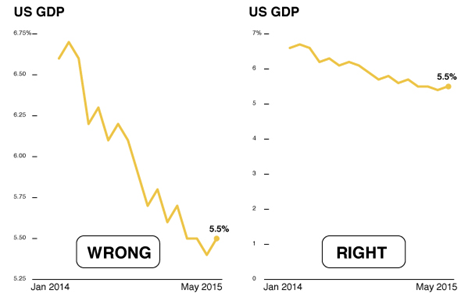

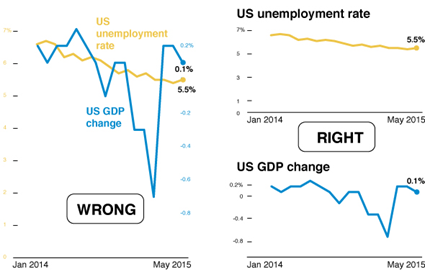

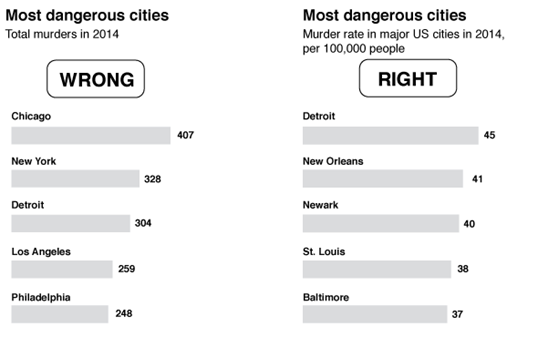

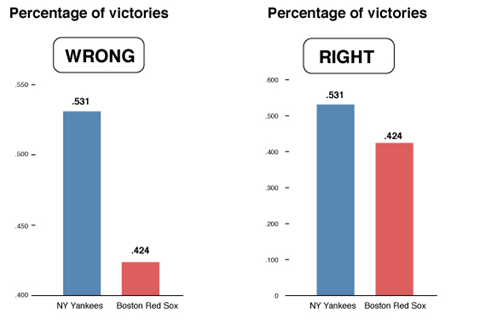

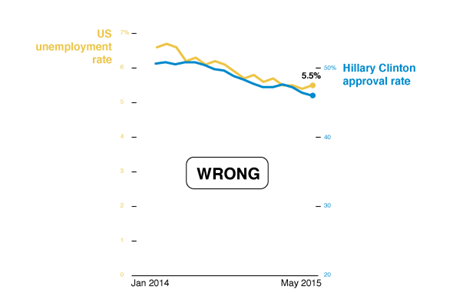

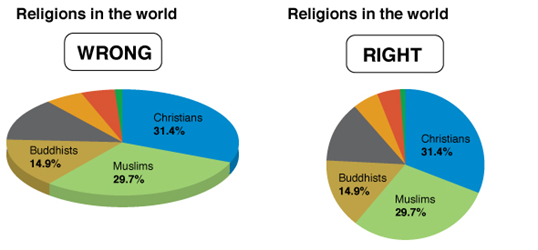

In the chart on the left, the percentage of Christians is the biggest value, but a larger amount of green shows for Muslims because of the 3-D effect.


**Discuss:** 
What story is the chart below trying to tell?
What is wrong with the chart?

_Source: CB Insights Newsletter dated 9/9/2021_

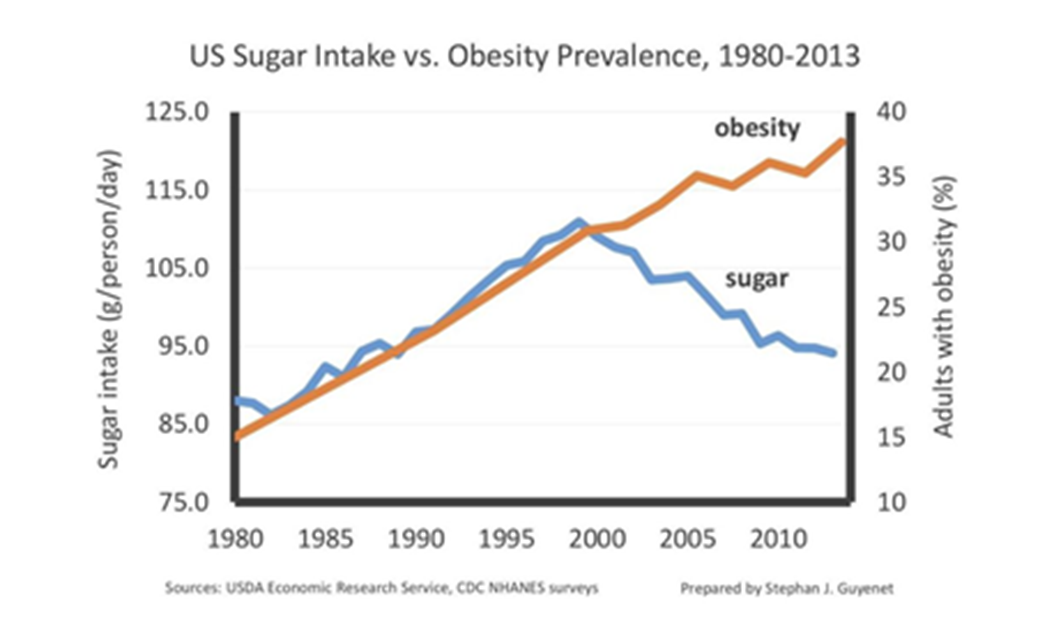



***
**VISUALIZATION NOTEBOOK ENDS HERE**
***

**Below are graphics used to show activation functions for a future chapter**
## Visualizing Activation Functions

In [127]:
def sigmoid(x):
    result = 1/(1+np.exp(-x))
    df = pd.DataFrame(data=result, index = x, columns=['Sigmoid'])
    return df

def tanh(x):
    result = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    df = pd.DataFrame(data=result, index = x, columns=['TANH'])
    return df


def relu(x):
    result = np.maximum(0,x)
    df = pd.DataFrame(data=result, index = x, columns=['RELU'])
    return df

def leakyrelu(x):
    val = []
    index =[]
    for item in list(x):

        if item <0:
            result = 0.01 * item
        else:
            result = item
        val.append(result)
        index.append(item)
        df = pd.DataFrame(val, columns=['Leaky RELU'])
        df.index = index
    return df

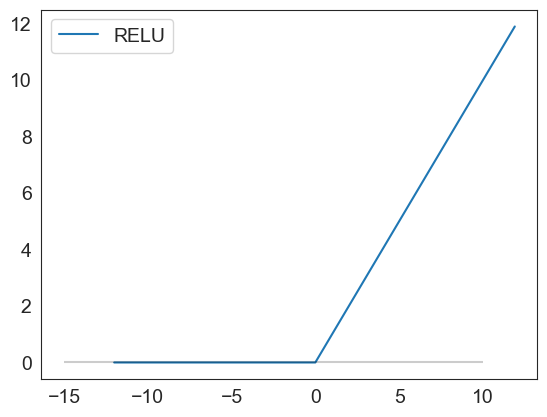

In [128]:
relu(np.arange(-12,12,.1)).plot()
plt.hlines(0, xmin = -15, xmax=10, color='black', alpha=.2)

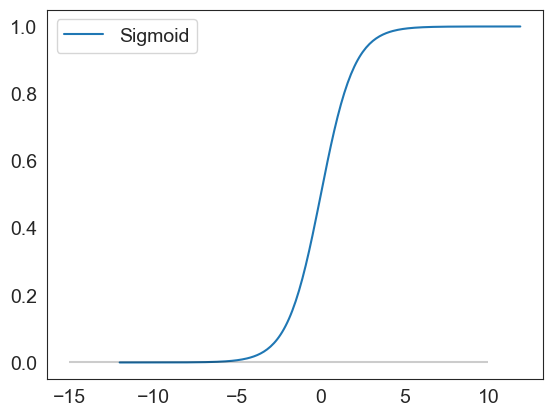

In [129]:
sigmoid(np.arange(-12,12,.1)).plot()
plt.hlines(0, xmin = -15, xmax=10, color='black', alpha=.2)

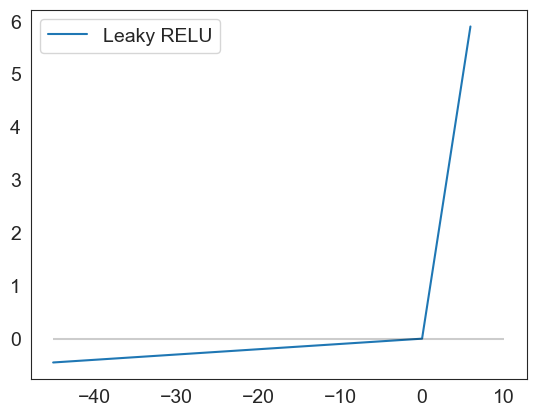

In [130]:
leakyrelu(np.arange(-45,6,.1)).plot()
plt.hlines(0, xmin = -45, xmax=10, color='black', alpha=.2)

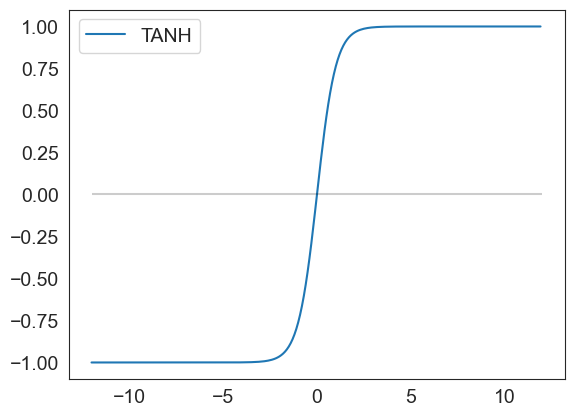

In [131]:
tanh(np.arange(-12,12,.1)).plot()
plt.hlines(0, xmin = -12, xmax=12, color='black', alpha=.2)